## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_test =  pd.read_csv('titanic_test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Exploratory Data Analysis

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking the missing values
titanic_train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#!pip install missingno

<Axes: >

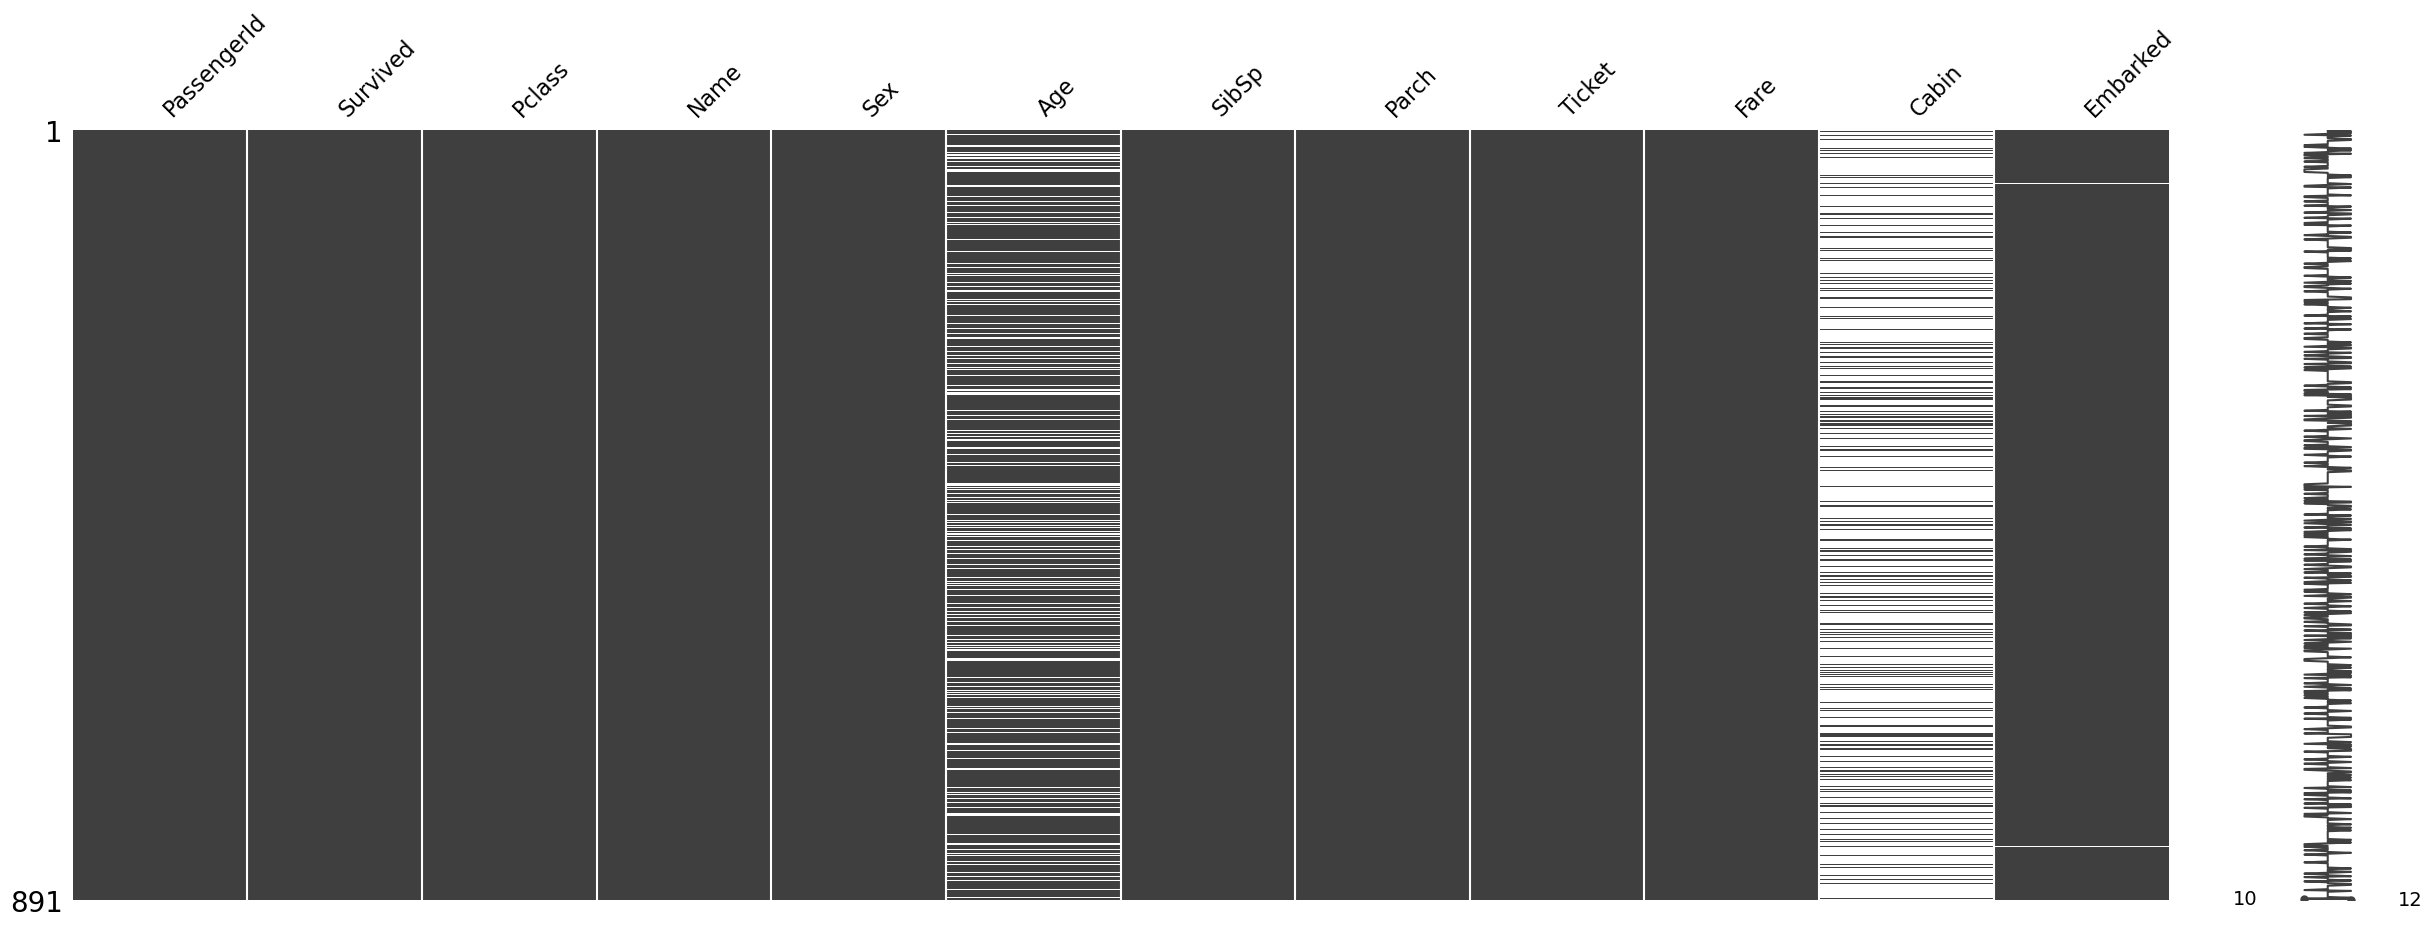

In [9]:
import missingno as msno
msno.matrix(titanic_train, figsize = (30,10))

In [10]:
# Feature Selection

columns_to_be_added_as_features = ['Sex','Age','SibSp','Parch','Pclass','Fare','Embarked']
train = pd.read_csv('titanic_train.csv', usecols=columns_to_be_added_as_features+['Survived'])
test = titanic_test[columns_to_be_added_as_features]

In [11]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

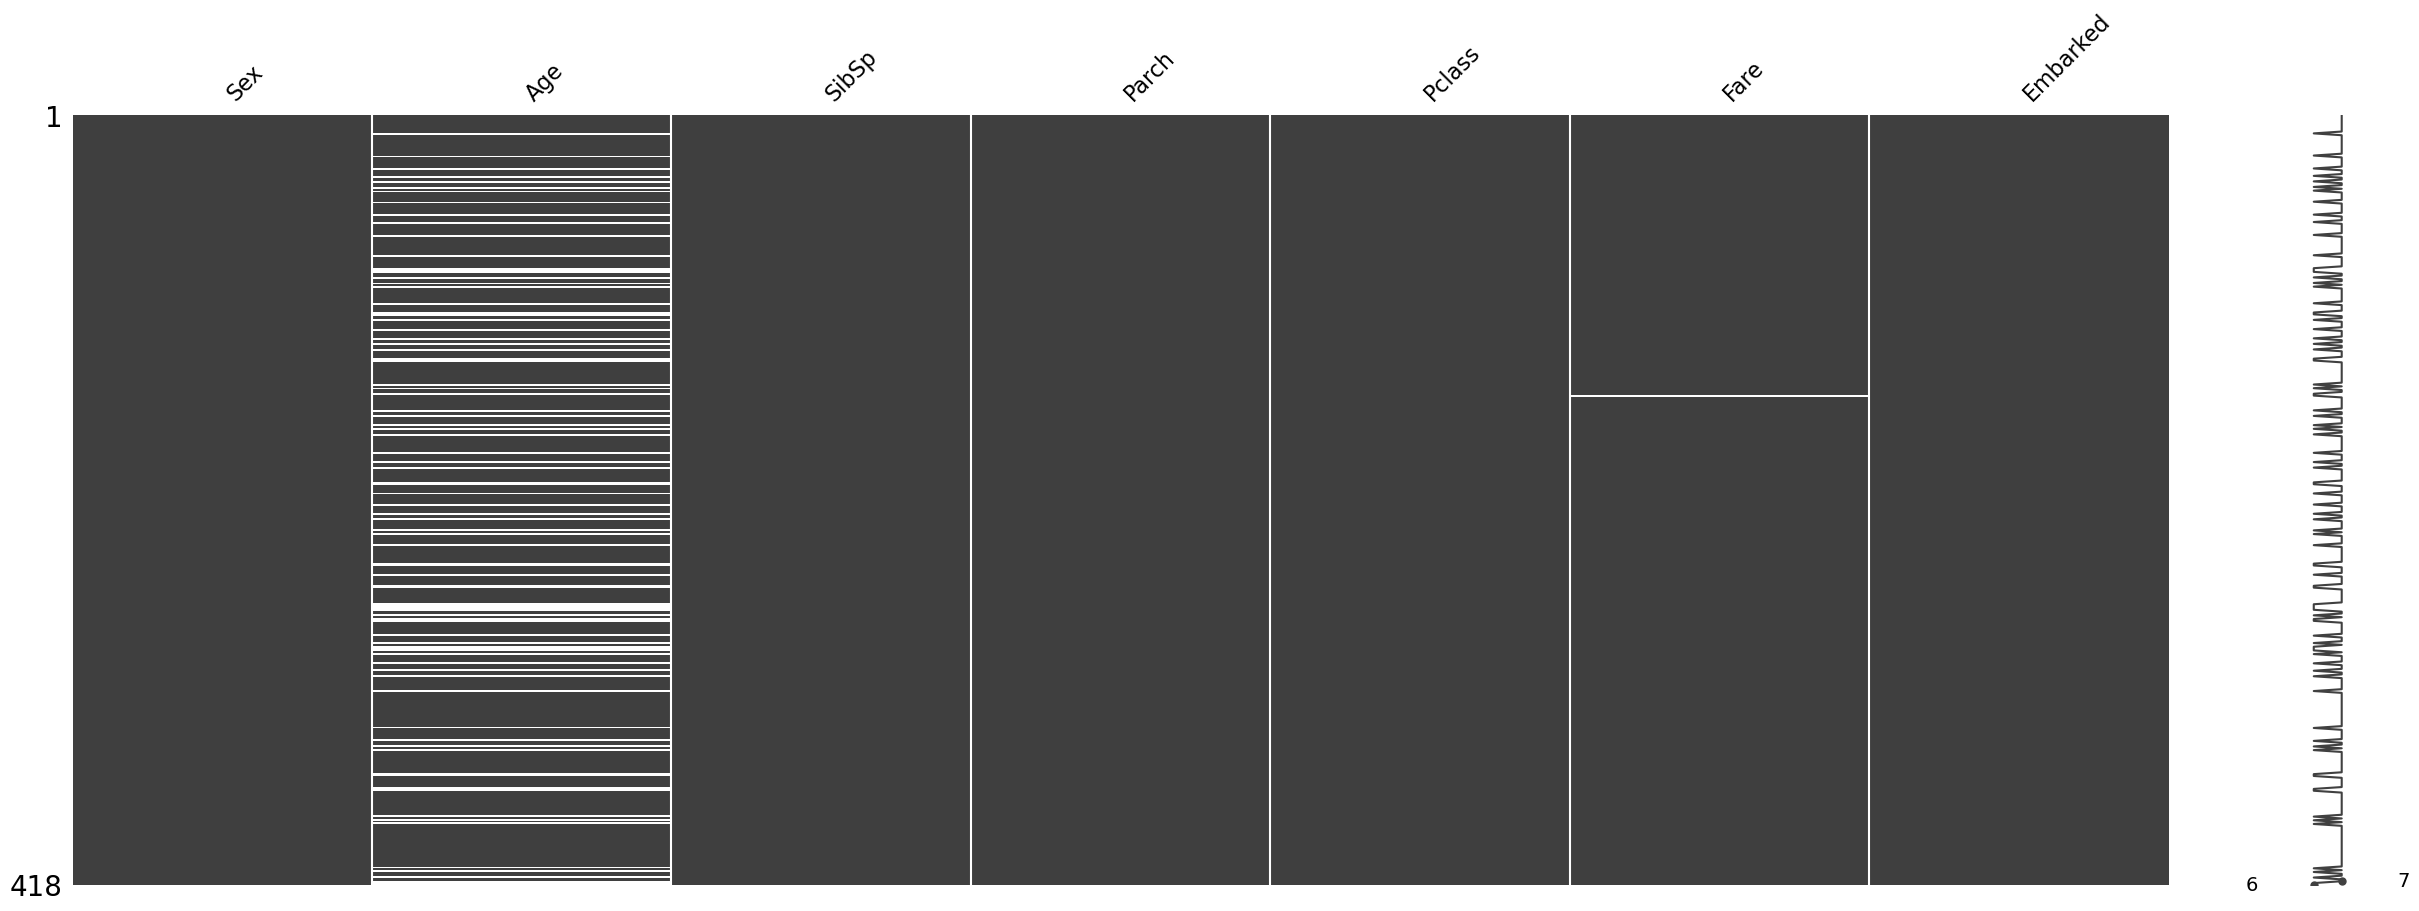

In [12]:
msno.matrix(test, figsize = (30,10))

In [13]:
test.head()

,Sex,Age,SibSp,Parch,Pclass,Fare,Embarked
0,male,34.5,0,0,3,7.8292,Q
1,female,47.0,1,0,3,7.0000,S
2,male,62.0,0,0,2,9.6875,Q
3,male,27.0,0,0,3,8.6625,S
4,female,22.0,1,1,3,12.2875,S


In [14]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [15]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Sex')

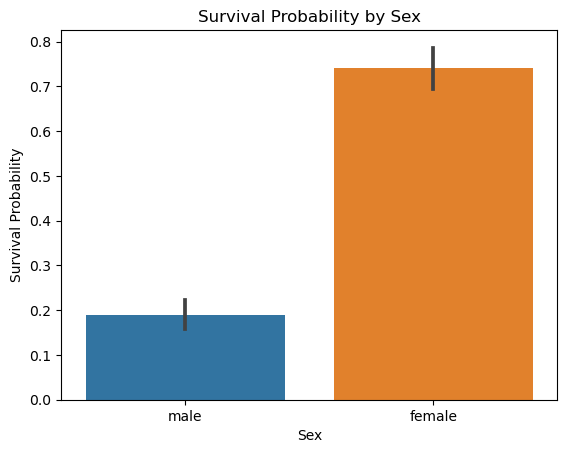

In [16]:
# Visualizing Survival Probability by Sex

sns.barplot(x ='Sex', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex')

In [17]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Class')

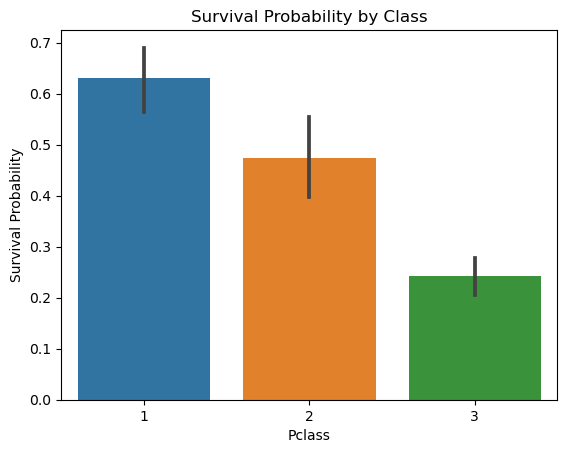

In [18]:
# Visualizing Survival Probability by Class

sns.barplot(x ='Pclass', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Class')

Text(0.5, 1.0, 'Survival Probability by both Sex and Class')

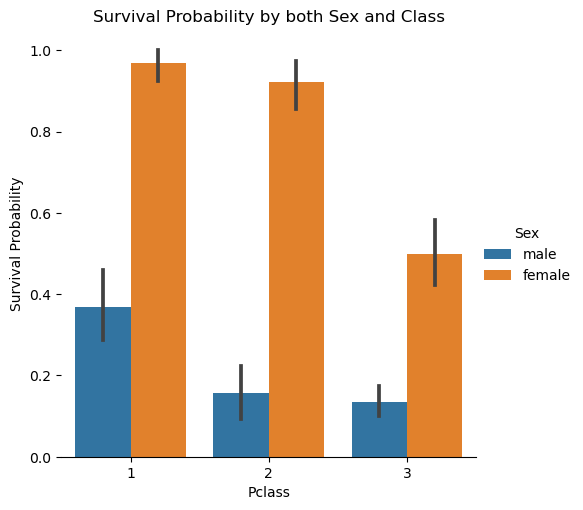

In [19]:
# Visualizing Survival Probability by both Sex and Class

g = sns.catplot(x ='Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by both Sex and Class')

In [20]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Embarked')

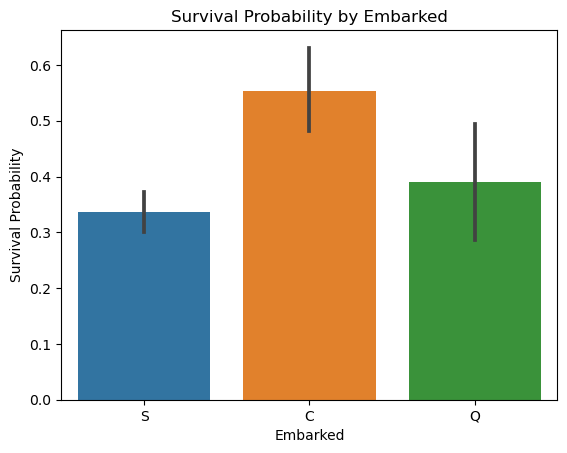

In [21]:
# Visualizing Survival Probability by Embarked

sns.barplot(x ='Embarked', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Embarked')

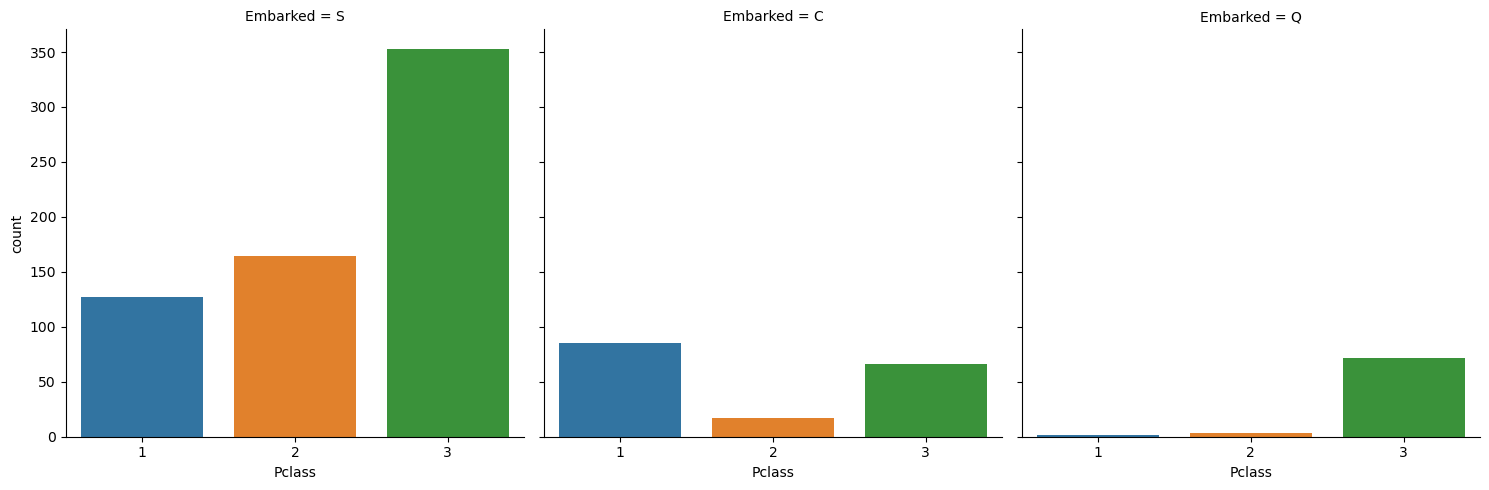

In [22]:
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count', col_wrap=3)

In [23]:
train['Embarked'].fillna('C', inplace=True)

In [24]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## Data Preprocessing

In [25]:
# Label Encoding

train['Embarked'].replace('Q', 0,inplace=True)
train['Embarked'].replace('S', 1,inplace=True)
train['Embarked'].replace('C', 2,inplace=True)

test['Embarked'].replace('Q', 0,inplace=True)
test['Embarked'].replace('S', 1,inplace=True)
test['Embarked'].replace('C', 2,inplace=True)

train['Sex'].replace('male', 0,inplace=True)
train['Sex'].replace('female', 1,inplace=True)
test['Sex'].replace('male', 0,inplace=True)
test['Sex'].replace('female', 1,inplace=True)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [27]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

In [28]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
test.isnull().sum()

Sex         0
Age         0
SibSp       0
Parch       0
Pclass      0
Fare        0
Embarked    0
dtype: int64

In [30]:
corr_matrix = train.corr()
corr_matrix['Survived'].sort_values(ascending = False)

Survived    1.000000
Sex         0.543351
Fare        0.257307
Embarked    0.131042
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64

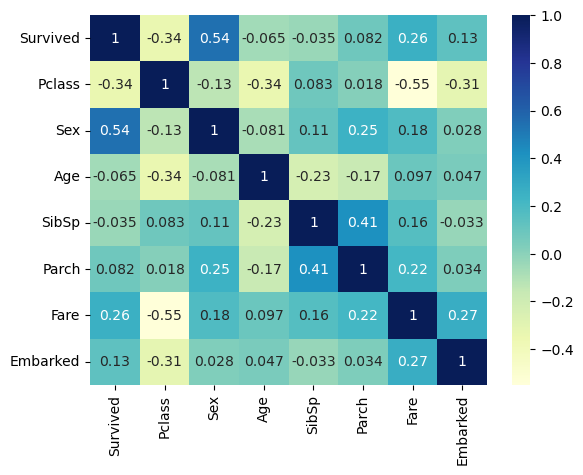

In [31]:
# plotting correlation heatmap

dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [32]:
train = train.sample(frac=1).reset_index(drop=True)

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,28.0,3,1,25.4667,1
1,0,3,0,24.0,0,0,7.4958,1
2,1,2,1,34.0,0,0,10.5000,1
3,1,3,0,26.0,0,0,18.7875,2
4,0,3,1,9.0,3,2,27.9000,1


In [34]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

##  Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(train[columns_to_be_added_as_features],train['Survived'], test_size= 0.2, random_state =42,  stratify = train['Survived'])

# Print the sizes of the sets
print("Total set size :",len(train))
print("Training set size :",len(x_train))
print("Validation set size :",len(x_val))

Total set size : 891
Training set size : 712
Validation set size : 179


In [36]:
x_train.head()

,Sex,Age,SibSp,Parch,Pclass,Fare,Embarked
683,1,4.0,0,2,3,22.0250,1
494,0,31.0,0,0,3,7.7500,0
537,0,54.0,0,0,1,51.8625,1
850,1,27.0,0,1,3,12.4750,1
793,1,30.0,0,0,2,12.3500,0


In [37]:
y_train.head()

683    1
494    0
537    0
850    1
793    1
Name: Survived, dtype: int64

In [38]:
cols_std = ['Age', 'Fare']

In [39]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

# Standardization

def standardize(df):
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)
    result = pd.DataFrame(scaled_df, columns=df.columns)
    return result

train[cols_std] = standardize(train[cols_std])
test[cols_std] = standardize(test[cols_std])

In [40]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.104637,3,1,-0.135658,1
1,0,3,0,-0.412037,0,0,-0.497496,1
2,1,2,1,0.356462,0,0,-0.437007,1
3,1,3,0,-0.258337,0,0,-0.270141,2
4,0,3,1,-1.564784,3,2,-0.086664,1
...,...,...,...,...,...,...,...,...
886,0,3,0,0.279612,0,0,-0.491874,1
887,0,2,0,-0.104637,0,0,-0.437007,1
888,0,3,0,-0.335187,0,0,-0.492545,0
889,0,3,0,-0.642586,0,0,-0.490280,1


In [41]:
test

,Sex,Age,SibSp,Parch,Pclass,Fare,Embarked
0,0,0.386231,0,0,3,-0.498407,0
1,1,1.371370,1,0,3,-0.513274,1
2,0,2.553537,0,0,2,-0.465088,0
3,0,-0.204852,0,0,3,-0.483466,1
4,1,-0.598908,1,1,3,-0.418471,1
...,...,...,...,...,...,...,...
413,0,-0.204852,0,0,3,-0.494448,1
414,1,0.740881,0,0,1,1.313753,2
415,0,0.701476,0,0,3,-0.508792,1
416,0,-0.204852,0,0,3,-0.494448,1


## Model Training and Evaluation

In [42]:
# Support Vector Classification Model

from sklearn.svm import SVC
svc = SVC(kernel = 'linear', C = 0.1 ,random_state = 42)
svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

y_pred = svc.predict(x_val)
acc = round(accuracy_score(y_val, y_pred), 2)
f1  = round(f1_score(y_val, y_pred),2)
accuracies = cross_val_score(estimator = svc, X = x_train, y = y_train, cv = 10, n_jobs = -1)
cv = accuracies.mean()
cv  = round(cv,2)

print("Accuracy Score :", acc)
print("F1 Score :", f1)
print("CV score :", cv)

Accuracy Score : 0.78
F1 Score : 0.7
CV score : 0.79


In [44]:
# Random Forest Classification Model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini' ,random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = rf.predict(x_val)
acc = round(accuracy_score(y_val, y_pred), 2)
f1  = round(f1_score(y_val, y_pred),2)
accuracies = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 10, n_jobs = -1)
cv = accuracies.mean()
cv  = round(cv,2)

print("Accuracy Score :", acc)
print("F1 Score :", f1)
print("CV score :", cv)

Accuracy Score : 0.84
F1 Score : 0.79
CV score : 0.81


## Test Submission

In [46]:
test_pred = svc.predict(test)

In [47]:
len(test_pred)

418

In [48]:
test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
submission = titanic_test[['PassengerId']]
submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [50]:
submission['Survived'] = test_pred

In [51]:
test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
submission.to_csv('titanic_sub.csv', index = None)

In [53]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
